# Uneven sampling distorts PCA

### Author: Chris Porras

In [1]:
################### Run this cell to load essential packages #####################
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
import seaborn as sns
rc = {'lines.linewidth': 3, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)
sns.set_palette('colorblind')
%matplotlib inline

In [148]:
### Load in data files
df = pd.read_csv('../data/1K_genomes_PCA.csv')
PC_load = np.load('../data/1kGenomesPCloading.npy')
superpop_key = pd.read_csv("../data/20131219.superpopulations.tsv", sep='\t')
pop_key = pd.read_csv('../data/20131219.populations.tsv',sep='\t').iloc[:,0:3]

### PCA plot by super population

#### De-anonymize unknown sample in df

In [149]:
unknown_id = pop_key.loc[pop_key['Population']=='PUR']

In [146]:
for i in 
df.iloc[0] = df.iloc[0].replace(['UNKNOWN'],
                                list(unknown_id.values[0])[i])

In [147]:
df.head()

,Sample_ID,PC1_0.03008,PC2_0.01143,PC3_0.00354,Super_Population,Population,Population_Description
0,HG01073,0.530511,-0.665716,-0.840097,Puerto Rican in Puerto Rico,Puerto Rican in Puerto Rico,Puerto Rican in Puerto Rico
1,HG00263,0.602287,-1.553598,0.194597,EUR,GBR,British in England and Scotland
2,HG00097,0.544015,-1.499157,-0.564666,EUR,GBR,British in England and Scotland
3,HG00099,0.621402,-1.336228,0.351901,EUR,GBR,British in England and Scotland
4,HG00100,0.610763,-1.208571,-0.496228,EUR,GBR,British in England and Scotland


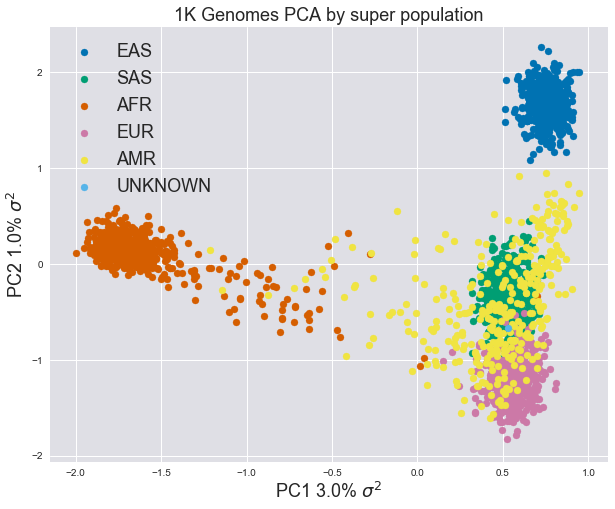

In [16]:
plt.figure(figsize=(10,8))
plt.title('1K Genomes PCA by super population')
plt.xlabel(f'PC1 {np.round(PC_load[0],2)*100}% '+r'$\sigma^2$')
plt.ylabel(f'PC2 {np.round(PC_load[1],2)*100}% '+r'$\sigma^2$')
for pop in superpop_key['Population Code']:
    PCs = df.loc[df['Super_Population']==pop].loc \
    [:,df.columns.str.contains('PC')]
    plt.scatter(PCs['PC1_0.03008'],PCs['PC2_0.01143'],label=pop)
plt.legend(fontsize=18)
plt.show()

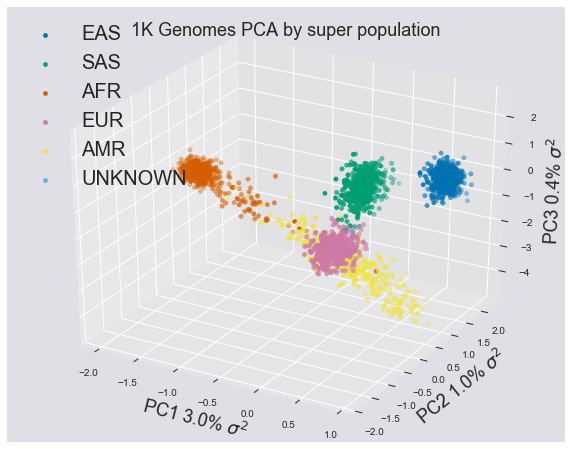

In [17]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_title('1K Genomes PCA by super population')
ax.set_xlabel(f'PC1 {np.round(PC_load[0],2)*100}% '+r'$\sigma^2$',
              labelpad=10)
ax.set_ylabel(f'PC2 {np.round(PC_load[1],2)*100}% '+r'$\sigma^2$',
              labelpad=10)
ax.set_zlabel(f'PC3 {np.round(PC_load[2],3)*100}% '+r'$\sigma^2$',
              labelpad=10)
for pop in superpop_key['Population Code']:
    PCs = df.loc[df['Super_Population']==pop].loc \
    [:,df.columns.str.contains('PC')]
    ax.scatter(PCs['PC1_0.03008'],PCs['PC2_0.01143'],PCs['PC3_0.00354'],
               label=pop)
ax.legend(fontsize=20,loc='upper left')